In [13]:
!pip install pandas numpy matplotlib seaborn textblob wordcloud


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


In [16]:
df = pd.read_csv("/content/amazon_reviews.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [17]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special chars
    text = text.lower()  # lowercase
    return text

df['cleaned_text'] = df['reviewText'].astype(str).apply(clean_text)

In [18]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Classify as Positive, Negative, Neutral
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0
    else ('Negative' if x < 0 else 'Neutral')
)


In [19]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Classify as Positive, Negative, Neutral
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0
    else ('Negative' if x < 0 else 'Neutral')
)


/tmp/ipython-input-2419394571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette="viridis")


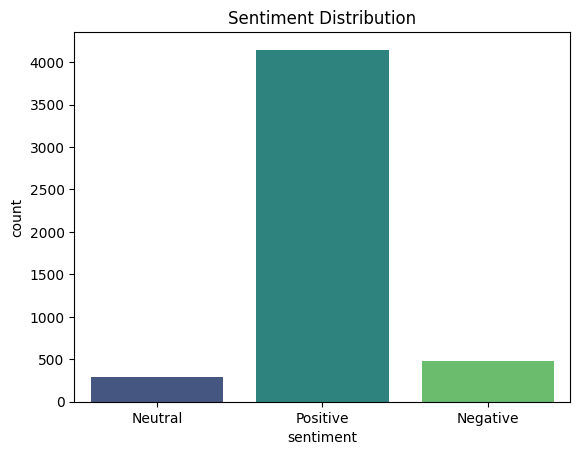

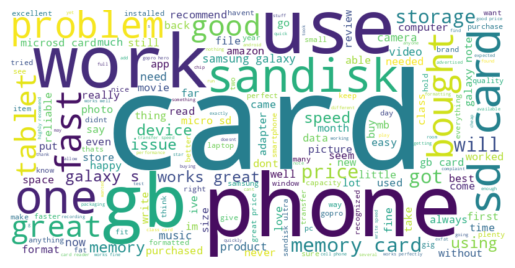

In [20]:
sns.countplot(x='sentiment', data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

# WordCloud for Positive Reviews
positive_text = " ".join(df[df['sentiment']=='Positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
